## Objective

We aim to predict whether a hotel booking will be canceled using guest behavior and booking details.  
We also explore how cancellation rates vary by country using visualizations.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


sb.set()

In [84]:
data = pd.read_csv("hotel_bookings.csv")

In [85]:
data.shape

(119390, 32)

In [86]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We are checking the source to see if there are null values

In [90]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [91]:
for col in data.columns:
    print(data[col].value_counts(dropna=False))  
    print( )

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

is_canceled
0    75166
1    44224
Name: count, dtype: int64

lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    23

## Data Preprocessing

We clean the dataset by handling missing values, transforming data types, and creating new variables that may help prediction, such as stay duration and total guests.

In [93]:
data = data[data['children'].isnull()==False]

Replaced the null values of the column ‘country’ with ‘Unknown’ .
Replaced the null values of the columns “agent” and “company” with 0

In [95]:
data['country'] = data['country'].fillna('Unknown')
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

Transformed the “company” and “agent” columns to string type (as we’re treating this as categorical variables)

In [97]:
data['agent'] = data['agent'].astype(str)
data['company'] = data['company'].astype(str)

Added new columns for “stay_duration”’ and “total_guests” and “Has_agent”

In [99]:
data['stay_duration'] = pd.DataFrame(data['stays_in_weekend_nights'] + data['stays_in_week_nights'])
data['total_guests']=pd.DataFrame(data['adults'] + data['babies'] + data['children'])
data['Has_Agent'] = data['agent'].apply(lambda x: 'Yes' if float(x) != 0 else 'No')

Checking to see if the columns 'total_guests' and stay_duration' have values with 0

In [101]:
data['total_guests'].value_counts()

total_guests
2.0     82048
1.0     22581
3.0     10494
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: count, dtype: int64

In [102]:
data['stay_duration'].value_counts()

stay_duration
2     27641
3     27076
1     21019
4     17383
7      8654
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: count, dtype: int64

Removed rows where values under “total_guests” and “stay_duration” was 0

In [104]:
data = data[data['total_guests']>0]
data = data[data['stay_duration']>0]

Checking for class imbalance to help improve the accuracy of the models being used later on

In [106]:
data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.627432
1    0.372568
Name: proportion, dtype: float64

Dropping unnecessary columns

In [108]:
data.drop(columns=['reservation_status', 'reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month'], inplace=True)

Cheching to see if there are many outliers under "adr" and "lead_time"

<Axes: xlabel='lead_time'>

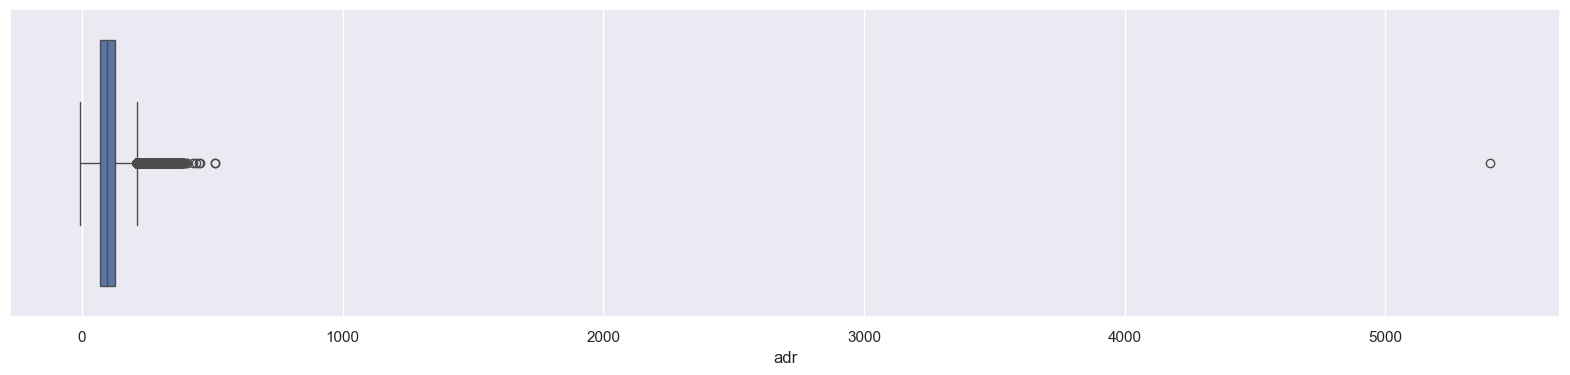

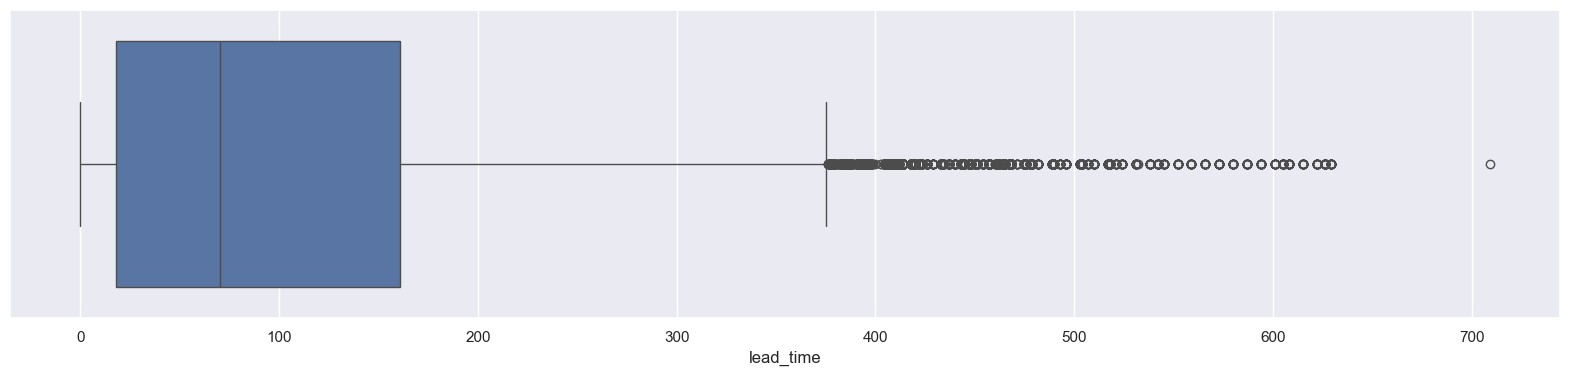

In [110]:
plt.figure(figsize = (20,4))
sb.boxplot (data = data["adr"] , orient = "h")
plt.figure(figsize = (20,4))
sb.boxplot (data = data["lead_time"] , orient = "h" )

We have decided to remove the outliers in hopes of increasing accuracy of the models being used later on

In [112]:
a = ['adr','lead_time']
for i in a:
    var = data[i]

    Q1 = var.describe().loc["25%"]
    Q3 = var.describe().loc["75%"]
    IQR = Q3-Q1
    
    
    Low = (Q1-(1.5*IQR))
    Upper = (Q3 + (1.5*IQR))

    data = data[(data[i] >= Low ) & (data[i] <Upper)]

After data cleaning and preparation, the dataset was reduced from 119,390 rows and 32 columns to 111,749 rows and 30 columns.
This included the removal of unnecessary or null-heavy columns, and the addition of 3 new engineered features.

In [113]:
data.shape

(111749, 30)